# Welcome to Python Notebooks and Blender! 👋

This course teaches you all of the tools you need automate repetitive reporting -- starting from the basics: Jupyter, Python and Mito. 

The course focuses on building Python skills that will be helpful to you in practice, leaving behind a lot of the theoretical explanations you might find in other courses. 

The goal of this course is to demistify the Python basics so you have the confidence to start applying Python automations in your day-to-day work.

Things to know before we start:
* 💡 -> the lightbulb emoji means thers an **important information**.
* 🧑‍💻 -> the Person Behind Computer emoji means thers an **task** waiting for you.
* This is not an exam, it's an opportunity to learn something new. You will get stuck at some point -- don't hesitate to ask questions to the Mito team, your colleagues, or Stack Overflow.
* Most imporantly: Enjoy the joureny!

## Part 1: Objects in Blender


In [2]:
import bpy

💡 The below code will select the default cube and create a variable

In [ ]:
cube = bpy.context.active_object
print(cube)

Now, we display attributes of the cube into the output.   
🧑‍💻 Run `cube.location` , `cube.scale` and `len(cube.data.vertices)`.  
💡 After writing `cube.` followed by the "Tab" key you will get suggestions from auto complete.  


In [ ]:
# TODO replace me with your code

🧑‍💻  Now, manipulate the cube.
1. Set the z location with `cube.location.z = 2`
2. Scale the cube with `cube.scale = (1, 1, 2)`
3. 

In [ ]:
# TODO replace me with your code


💡 We can also add default objects (torus, monkey, plane, ...) and select them with `obj = bpy.context.active_object`

In [ ]:
bpy.ops.mesh.primitive_monkey_add(size=2.5, location=(0, 0, 3))
monkey = bpy.context.active_object

bpy.ops.mesh.primitive_torus_add(major_radius=2, minor_radius=0.3, location=(0,0, 2))
tours = bpy.context.active_object

bpy.ops.mesh.primitive_plane_add(size=3, location=(0, 0, 1.1))  
plane = bpy.context.active_object

💡 Objects can also be removed

In [ ]:
bpy.data.objects.remove(tours)

 🧑‍💻 Now, delete the monkey and the plane as well.

💡 The below script will randomly place 10 spheres in the scene.

In [ ]:
import random

for i in range(10):
    x = random.uniform(-10, 10)
    y = random.uniform(-10, 10)
    z = 0
    bpy.ops.mesh.primitive_uv_sphere_add(radius=1, location=(x, y, z))

 🧑‍💻 Now, run the above cell 5 times.

💡 Executing the cell multiple times will add objects multiple times.   
  Therefore, it's good to clear the whole scene from time to time.

🚨 The below cell will delete everything from your scene.

In [ ]:
def fresh_scene():
    # Deselect and delete all objects except cameras and lights
    bpy.ops.object.select_all(action='DESELECT')
    for obj in bpy.context.scene.objects:
        if obj.type not in {'CAMERA', 'LIGHT'}:
            obj.select_set(True)
    bpy.ops.object.delete()

fresh_scene()

💡 Objects will show up in our scene collection. We can also give them names.

In [ ]:
fresh_scene()
cube_names = ["Foo", "Bar", "Baz", "Qux"]
for i, name in enumerate(cube_names):
    bpy.ops.mesh.primitive_cube_add(location=(i * 3, 0, 0))  
    cube = bpy.context.object                                     
    cube.name = name                        

💡 And we can apply modifiers to change the appearance.


In [ ]:
cube_names = ["Foo", "Bar", "Baz", "Qux"]

for name in cube_names:
    cube = bpy.data.objects.get(name)
    if cube:   # Check if the cube exists
        bevel_modifier = cube.modifiers.new(name="Bevel", type='BEVEL')
        bevel_modifier.width = 0.5
        bevel_modifier.segments = 3

💡 Running the above cell multiple times will add modifiers on top of each other and should be avoided.  
🧑‍💻 Try changing the bevel width in the below cell for two values.

In [ ]:
for name in cube_names:
    cube = bpy.data.objects.get(name)
    if cube: # Check if the cube exists
        for modifier in cube.modifiers:
            if modifier.type == 'BEVEL':
                modifier.width = 0.2

💡 Finally, modifiers can also be removed like this:

In [ ]:
cube_names = ["Foo", "Bar", "Baz", "Qux"]

for name in cube_names:
    cube = bpy.data.objects.get(name)
    if cube: # Check if the cube exists
        cube.modifiers.clear()

 🧑‍💻 Now make a simple histogram using 20 cylinders.
* The cylinders should be be placed on the x axis.
* the Height should be a random value between 3 and 5  
  
 **Hint**: use `bpy.ops.mesh.primitive_cylinder_add(radius=0.5, depth=2, location=(0,1,0))` to add a cylinder

In [ ]:
# TODO replace me with your code


In [ ]:
# TODO ONLY IN TUTOR VERSION
fresh_scene()
for i in range(0,7):
    z = random.uniform(4, 10)
    bpy.ops.mesh.primitive_cylinder_add(radius=0.5, depth=z, location=(0,i,z/2))

💡 We can also create a collection and put the objects into it.

In [ ]:
fresh_scene()

# Create the Histogram collection
histo_collection = bpy.data.collections.new("Histogram")
bpy.context.scene.collection.children.link(histo_collection)

# Create 5 spheres, name them, and link each to the Histogram collection
for i in range(5):
    bpy.ops.mesh.primitive_uv_sphere_add(radius=0.5, location=(i * 2, 0, 0))
    sphere = bpy.context.object
    sphere.name = f"Sphere_{i+1}"
    histo_collection.objects.link(sphere)
    
    # Unlink the sphere from all other collections
    for collection in sphere.users_collection:
        if collection != histo_collection:
            collection.objects.unlink(sphere)

💡 Delete the Histogram collection and all objects within it

In [ ]:
# Delete the Histogram collection and all objects within it
bpy.data.collections.remove(histo_collection)

# Part 2: Using Python Packages

Let's use Python packages to generate data.  
💡 We can install packages using uv

In [ ]:
!uv pip install numpy

💡 We can import a package and make a gaussian mesh

In [ ]:
import numpy as np
sigma = 2
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
x, y = np.meshgrid(x, y)
z = 2 * np.exp(-(x**2 + y**2) / (2 * sigma**2))

💡 We can now add sphere by sphere, but that's slow

In [ ]:
fresh_scene()
# Flatten the arrays and use zip to iterate over coordinates
for xi, yi, zi in zip(x.flatten(), y.flatten(), z.flatten()):
    bpy.ops.mesh.primitive_uv_sphere_add(radius=0.1, location=(xi, yi, zi))

# Part 3: Using meshes

💡 Instead of points, we can use meshes, and save verices in a point cloud!

In [ ]:
fresh_scene()

import mathutils
# Flatten the arrays and combine into a list of vectors
points = [mathutils.Vector((xi, yi, zi)) for xi, yi, zi in zip(x.flatten(), y.flatten(), z.flatten())]

# Create a new mesh and object for the point cloud
mesh = bpy.data.meshes.new("PointCloudMesh")
point_obj = bpy.data.objects.new("PointCloud", mesh)

# Apply the points to the mesh
mesh.from_pydata(points, edges=[], faces=[])
mesh.update()
bpy.context.collection.objects.link(point_obj)

Here, we have a wave field:

In [ ]:
fresh_scene()

amplitude = 1 

# Generate x and y arrays
x = np.linspace(-10, 10, 150)
y = np.linspace(-10, 10, 150)
x, y = np.meshgrid(x, y)
z = amplitude * np.sin (x) * np.cos(y) 

# Flatten the arrays and combine into a list of vectors
points = [mathutils.Vector((xi, yi, zi)) for xi, yi, zi in zip(x.flatten(), y.flatten(), z.flatten())]

# Create a new mesh and object for the point cloud
mesh = bpy.data.meshes.new("PointCloudMesh")
point_obj = bpy.data.objects.new("PointCloud", mesh)

# Apply the points to the mesh
mesh.from_pydata(points, edges=[], faces=[])
mesh.update()
bpy.context.collection.objects.link(point_obj)

💡 We can also update data, and update the existing shape.  
🧑‍💻 Run the below cell 3 times, with varying parameters (e.g. higher amplitdute, other function)

In [ ]:
amplitude = 2
z = amplitude * np.sin(x) * np.cos(y)
points = [mathutils.Vector((xi, yi, zi)) for xi, yi, zi in zip(x.flatten(), y.flatten(), z.flatten())]

# Update the existing mesh with the new points
mesh.clear_geometry()  # Clear existing geometry
mesh.from_pydata(points, edges=[], faces=[])
mesh.update()

# Part 4: manipulating data using pandas
New, we will use data from the web to build this scene:
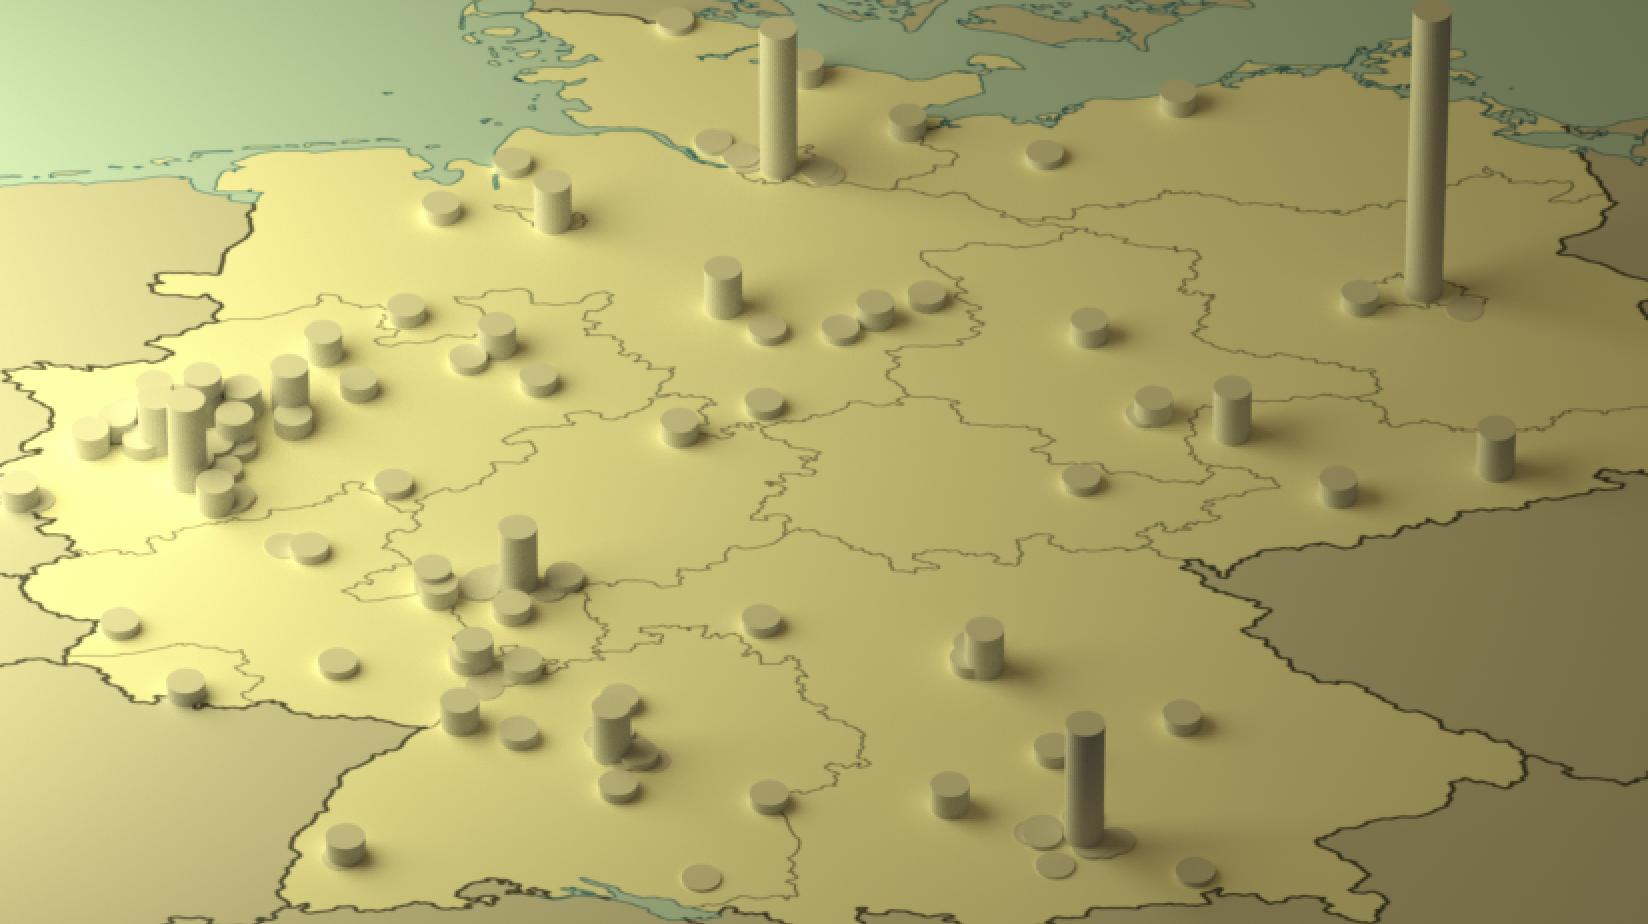

💡 With pandas, we can read CSV files from URLS.  

In [4]:
import pandas as pd
url = 'https://simplemaps.com/static/data/country-cities/de/de.csv'
df = pd.read_csv(url)

# Drop rows where population_proper is NaN
df = df.dropna(subset=['population_proper'])

df

city      lat      lng  country iso2              admin_name  \
0        Berlin  52.5200  13.4050  Germany   DE                  Berlin   
1     Stuttgart  48.7775   9.1800  Germany   DE       Baden-Württemberg   
2        Munich  48.1375  11.5750  Germany   DE                 Bavaria   
3       Hamburg  53.5500  10.0000  Germany   DE                 Hamburg   
4       Cologne  50.9364   6.9528  Germany   DE  North Rhine-Westphalia   
..          ...      ...      ...      ...  ...                     ...   
122  Neulußheim  49.2933   8.5219  Germany   DE       Baden-Württemberg   
123   Eichwalde  52.3667  13.6167  Germany   DE             Brandenburg   
124     Altbach  48.7239   9.3797  Germany   DE       Baden-Württemberg   
125  Merzhausen  47.9664   7.8286  Germany   DE       Baden-Württemberg   
126   Buckenhof  49.5939  11.0500  Germany   DE                 Bavaria   

     capital  population  population_proper  
0    primary   4890363.0          3755251.0  
1      admin   2787724.0           632865.0  
2      admin   2606021.0          1512491.0  
3      admin   2484800.0          1892122.0  
4        NaN   1084831.0          1084831.0  
..       ...         ...                ...  
122      NaN      7128.0             7128.0  
123      NaN      6475.0             6475.0  
124      NaN      6422.0             6422.0  
125      NaN      5347.0             5347.0  
126      NaN      3157.0             3157.0  

[127 rows x 9 columns]

💡 Let's alos load a basemap and define the coordinate bounds

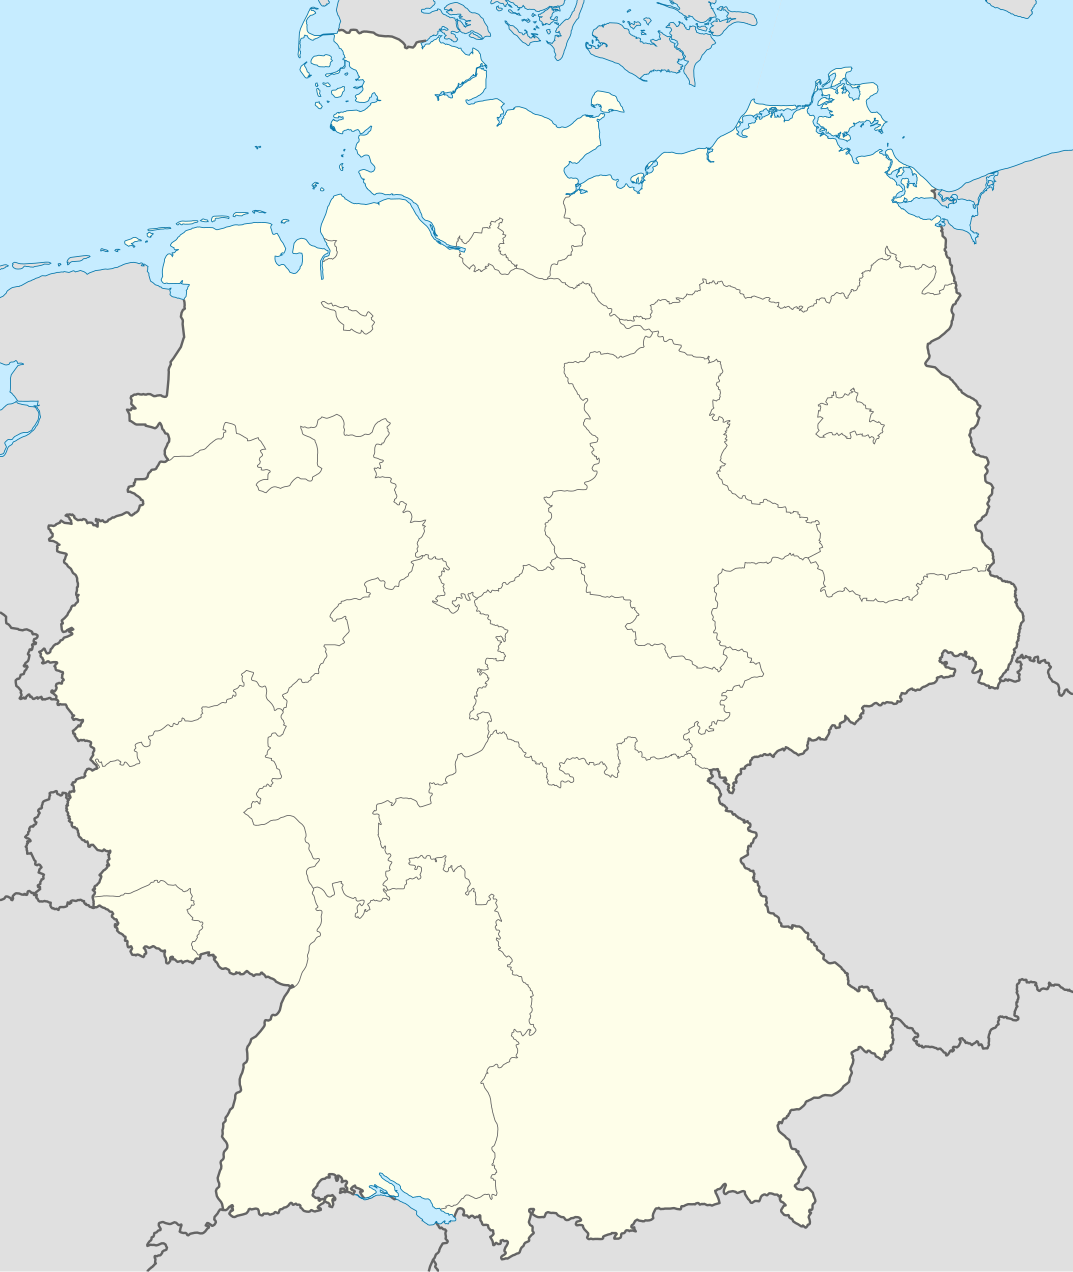

In [23]:
import requests
from IPython.display import Image

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Germany_location_map.svg/1073px-Germany_location_map.svg.png"
response = requests.get(url)

with open("Germany_location_map.png", "wb") as file:
    file.write(response.content)

# https://upload.wikimedia.org/wikipedia/commons/0/0d/Germany_location_map.svg
# Define the coordinate bounds
north = 55.1  # Northern latitude in deg
south = 47.2  # Southern latitude in deg
west = 5.5    # Western longitude in deg
east = 15.5   # Eastern longitude in deg

Image("Germany_location_map.png", width=300)

💡 Plot with matplotlib

In [24]:
!uv pip install pandas matplotlib

Using Python 3.11.10 environment at /Users/jan-hendrik/Desktop/blender_python_workshop/.venv
Audited 2 packages in 4ms


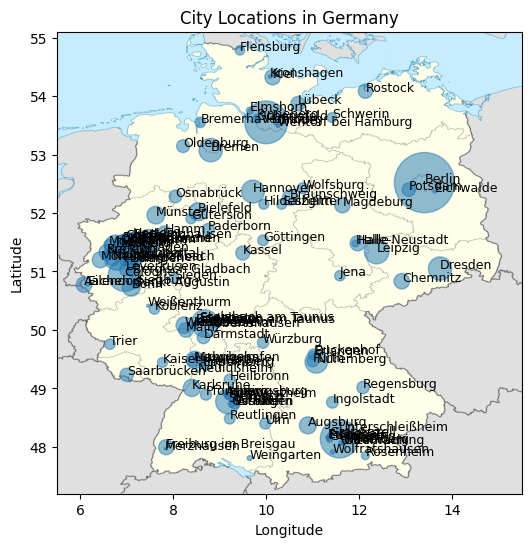

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the base map
base_map = mpimg.imread('Germany_location_map.png')

# Create figure and plot
plt.figure(figsize=(6, 6))
plt.imshow(base_map, extent=[5.5, 15.5, 47.2, 55.1], aspect='auto')

# Plot the cities
plt.scatter(df['lng'], df['lat'], s=0.0005 * df['population_proper'], alpha=0.5)

# Annotate cities
for i, city in enumerate(df['city']):
    plt.text(df['lng'][i], df['lat'][i], city, fontsize=9)

# Set the axis limits to match the specified boundaries
plt.xlim(5.5, 15.5)
plt.ylim(47.2, 55.1)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations in Germany')

plt.show()

💡 Filter for the **coordinates** and the **population**

In [26]:
selected_columns = df[['lat', 'lng', 'population_proper']]
selected_columns

lat      lng  population_proper
0    52.5200  13.4050          3755251.0
1    48.7775   9.1800           632865.0
2    48.1375  11.5750          1512491.0
3    53.5500  10.0000          1892122.0
4    50.9364   6.9528          1084831.0
..       ...      ...                ...
122  49.2933   8.5219             7128.0
123  52.3667  13.6167             6475.0
124  48.7239   9.3797             6422.0
125  47.9664   7.8286             5347.0
126  49.5939  11.0500             3157.0

[127 rows x 3 columns]

In [27]:
import bpy
import mathutils

mesh = bpy.data.meshes.new("PointCloudMesh")
point_obj = bpy.data.objects.new("PointCloud", mesh)
bpy.context.collection.objects.link(point_obj)

In [28]:
offset_x = -8
offset_y = -50
x = df['lng'].values
y = df['lat'].values
z = df['population_proper'].values * 0.0000005

# Update the existing mesh with the new points
points = [mathutils.Vector((xi, yi, zi)) for xi, yi, zi in zip(x, y, z)]
mesh.clear_geometry()  # Clear existing geometry
mesh.from_pydata(points, edges=[], faces=[])
mesh.update()

point_obj.location = (offset_x, offset_y, 0)

In [29]:
# Calculate the center coordinates of the bounding box
center_x = (west + east) / 2
center_y = (north + south) / 2

map_location = (center_x + offset_x, center_y + offset_y, 0 )
# Add the plane and set it at the calculated center location
bpy.ops.mesh.primitive_plane_add(size=1, location= map_location)
plane = bpy.context.object

# Create a new material and assign the image texture
material = bpy.data.materials.new(name="ImageMaterial")
material.use_nodes = True
bsdf = material.node_tree.nodes["Principled BSDF"]

# Add and load the image texture
tex_image = material.node_tree.nodes.new('ShaderNodeTexImage')
tex_image.image = bpy.data.images.load("Germany_location_map.png")

# Connect the texture to the Base Color of the BSDF shader
material.node_tree.links.new(bsdf.inputs['Base Color'], tex_image.outputs['Color'])
plane.data.materials.append(material)

# Calculate the scale based on the geographic bounds
plane.scale.x = (east - west)
plane.scale.y = (north - south) 

✨ Congrats!
By now, you've learned about **basic object manipulation**, and how to **send data from Python to Blender**.  


Now, we will continue with a short introduction to **Geometry Nodes**.

# Part 5:  Geometry nodes introduction

# Part 6:  Using data attributes

Till now, we hard coded the values as positions in the mesh.    
But there is a more elegant way to pipe data into our objects using **data attributes**.  
Every vertex of the mesh can store these attributes, and these can be accessed in geometry nodes, using the **Named attribute** node.

💡 First, we add 127 points to the origin (for every row of the dataframe one).

In [30]:
df

city      lat      lng  country iso2              admin_name  \
0        Berlin  52.5200  13.4050  Germany   DE                  Berlin   
1     Stuttgart  48.7775   9.1800  Germany   DE       Baden-Württemberg   
2        Munich  48.1375  11.5750  Germany   DE                 Bavaria   
3       Hamburg  53.5500  10.0000  Germany   DE                 Hamburg   
4       Cologne  50.9364   6.9528  Germany   DE  North Rhine-Westphalia   
..          ...      ...      ...      ...  ...                     ...   
122  Neulußheim  49.2933   8.5219  Germany   DE       Baden-Württemberg   
123   Eichwalde  52.3667  13.6167  Germany   DE             Brandenburg   
124     Altbach  48.7239   9.3797  Germany   DE       Baden-Württemberg   
125  Merzhausen  47.9664   7.8286  Germany   DE       Baden-Württemberg   
126   Buckenhof  49.5939  11.0500  Germany   DE                 Bavaria   

     capital  population  population_proper  
0    primary   4890363.0          3755251.0  
1      admin   2787724.0           632865.0  
2      admin   2606021.0          1512491.0  
3      admin   2484800.0          1892122.0  
4        NaN   1084831.0          1084831.0  
..       ...         ...                ...  
122      NaN      7128.0             7128.0  
123      NaN      6475.0             6475.0  
124      NaN      6422.0             6422.0  
125      NaN      5347.0             5347.0  
126      NaN      3157.0             3157.0  

[127 rows x 9 columns]

In [31]:
length = len(df)
vertices = [(0, 0, 0) for _ in range(length)]

mesh = bpy.data.meshes.new("PointCloudMeshwithAttributes")
point_obj = bpy.data.objects.new("PointCloudAttributes", mesh)
bpy.context.collection.objects.link(point_obj)

mesh.from_pydata(vertices, [], [])
mesh.update()

In [32]:
# Add each attribute individually to the mesh 
lat_attr = mesh.attributes.new(name='lat', type='FLOAT', domain='POINT')
lng_attr = mesh.attributes.new(name='lng', type='FLOAT', domain='POINT') 
population_attr = mesh.attributes.new(name='population_proper', type='FLOAT', domain='POINT')

In [ ]:
# set the values for the attributes
lat_attr.data.foreach_set('value', df['lat'].values)
lng_attr.data.foreach_set('value', df['lng'].values)
population_attr.data.foreach_set('value', df['population_proper'].values)

mesh.update()

the blender Geometry Nodes Spreadsheet will now look like this:
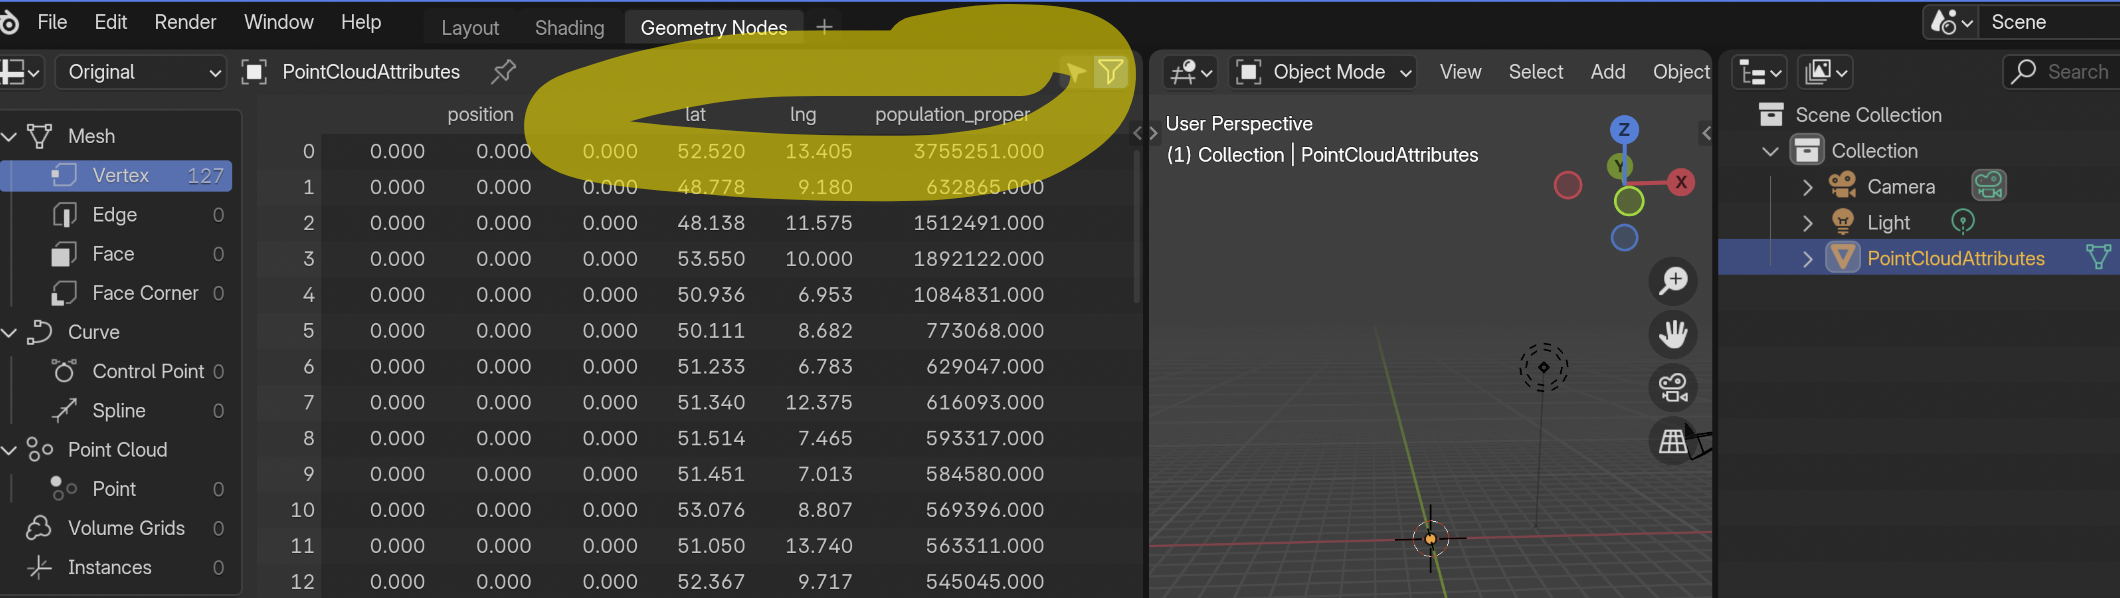

Now, we can update this data!  
Task: Scale the values from the todos

In [33]:
# set the values for the attributes
lat_attr.data.foreach_set('value', df['lat'].values-50)

# TODO: Add an offset to the longitude of -8
lng_attr.data.foreach_set('value', df['lng'].values-8) 

 # TODO: Add a multiplier of 0.0000005 to the population
population_attr.data.foreach_set('value', df['population_proper'].values* 0.0000005)

mesh.update()

Task: Now, add a new geonodes setup

Task: add a shader to the bars